In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import plotnine as p9

In [2]:
p9.options.dpi=300
plt.rcParams['svg.fonttype']='none'  

In [3]:
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300)

In [5]:
combined_adata=sc.read_h5ad(projectdir+'/Anndata/T0T3T5Clone1_combined.h5ad')

In [6]:
gene_signature=pd.read_csv(projectdir+'/Anndata/NIHMS955175-supplement-4.csv',header=0)

In [7]:
gene_signature.Signature.value_counts()

Transitory-Melanocytic                125
Undifferentiated                      118
Undifferentiated-Neural crest-like    106
Neural crest-like                      66
Melanocytic                            62
Transitory                             29
Neural crest-like-Transitory           25
Name: Signature, dtype: int64

In [8]:
gene_signature.Gene[~gene_signature.Gene.isin(combined_adata.var_names)]
#These genes have different names in adata
#Next I will find their alias used in adata

81      FAM196B
202       CYR61
208    C16orf45
209    C15orf52
236       SQRDL
346       SEPT4
432      FAM69C
438     D4S234E
464      ADRBK2
511         FYB
Name: Gene, dtype: object

In [9]:
gene_signature.Gene[gene_signature.Gene=='FAM196B']='INSYN2B'

gene_signature.Gene[gene_signature.Gene=='CYR61']='CCN1'

gene_signature.Gene[gene_signature.Gene=='C16orf45']='BMERB1'

gene_signature.Gene[gene_signature.Gene=='C15orf52']='CCDC9B'

gene_signature.Gene[gene_signature.Gene=='SQRDL']='SQOR'

gene_signature.Gene[gene_signature.Gene=='SEPT4']='SEPTIN4'

gene_signature.Gene[gene_signature.Gene=='FAM69C']='DIPK1C'

gene_signature.Gene[gene_signature.Gene=='D4S234E']='NSG1'

gene_signature.Gene[gene_signature.Gene=='ADRBK2']='GRK3'

gene_signature.Gene[gene_signature.Gene=='FYB']='FYB1'

In [10]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Undifferentiated'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='Undifferentiated_score',use_raw=True)

In [11]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Undifferentiated-Neural crest-like'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='Undifferentiated_NeuralCrest_score',use_raw=True)

In [12]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Neural crest-like'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='NeuralCrest_score',use_raw=True)

In [13]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Neural crest-like-Transitory'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='NeuralCrest_Transitory_score',use_raw=True)

In [14]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Transitory'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='Transitory_score',use_raw=True)

In [15]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Transitory-Melanocytic'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='Transitory_Melanocytic_score',use_raw=True)

In [16]:
sc.tl.score_genes(combined_adata,gene_signature[gene_signature.Signature=='Melanocytic'].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='Melanocytic_score',use_raw=True)

In [17]:
sc.tl.score_genes(combined_adata,gene_signature[(gene_signature.Signature=='Melanocytic') | (gene_signature.Signature=='Transitory-Melanocytic') | (gene_signature.Signature=='Transitory') | (gene_signature.Signature=='Neural crest-like-Transitory')].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='Differentiation_score',use_raw=True)

In [18]:
sc.tl.score_genes(combined_adata,gene_signature[(gene_signature.Signature=='Undifferentiated') | (gene_signature.Signature=='Undifferentiated-Neural crest-like') | (gene_signature.Signature=='Neural crest-like') ].Gene.to_list(),ctrl_size=50,n_bins=25,score_name='De-differentiation_score',use_raw=True)

In [19]:
combined_adata.obs.replace('Resist_clone1','D90',inplace=True)

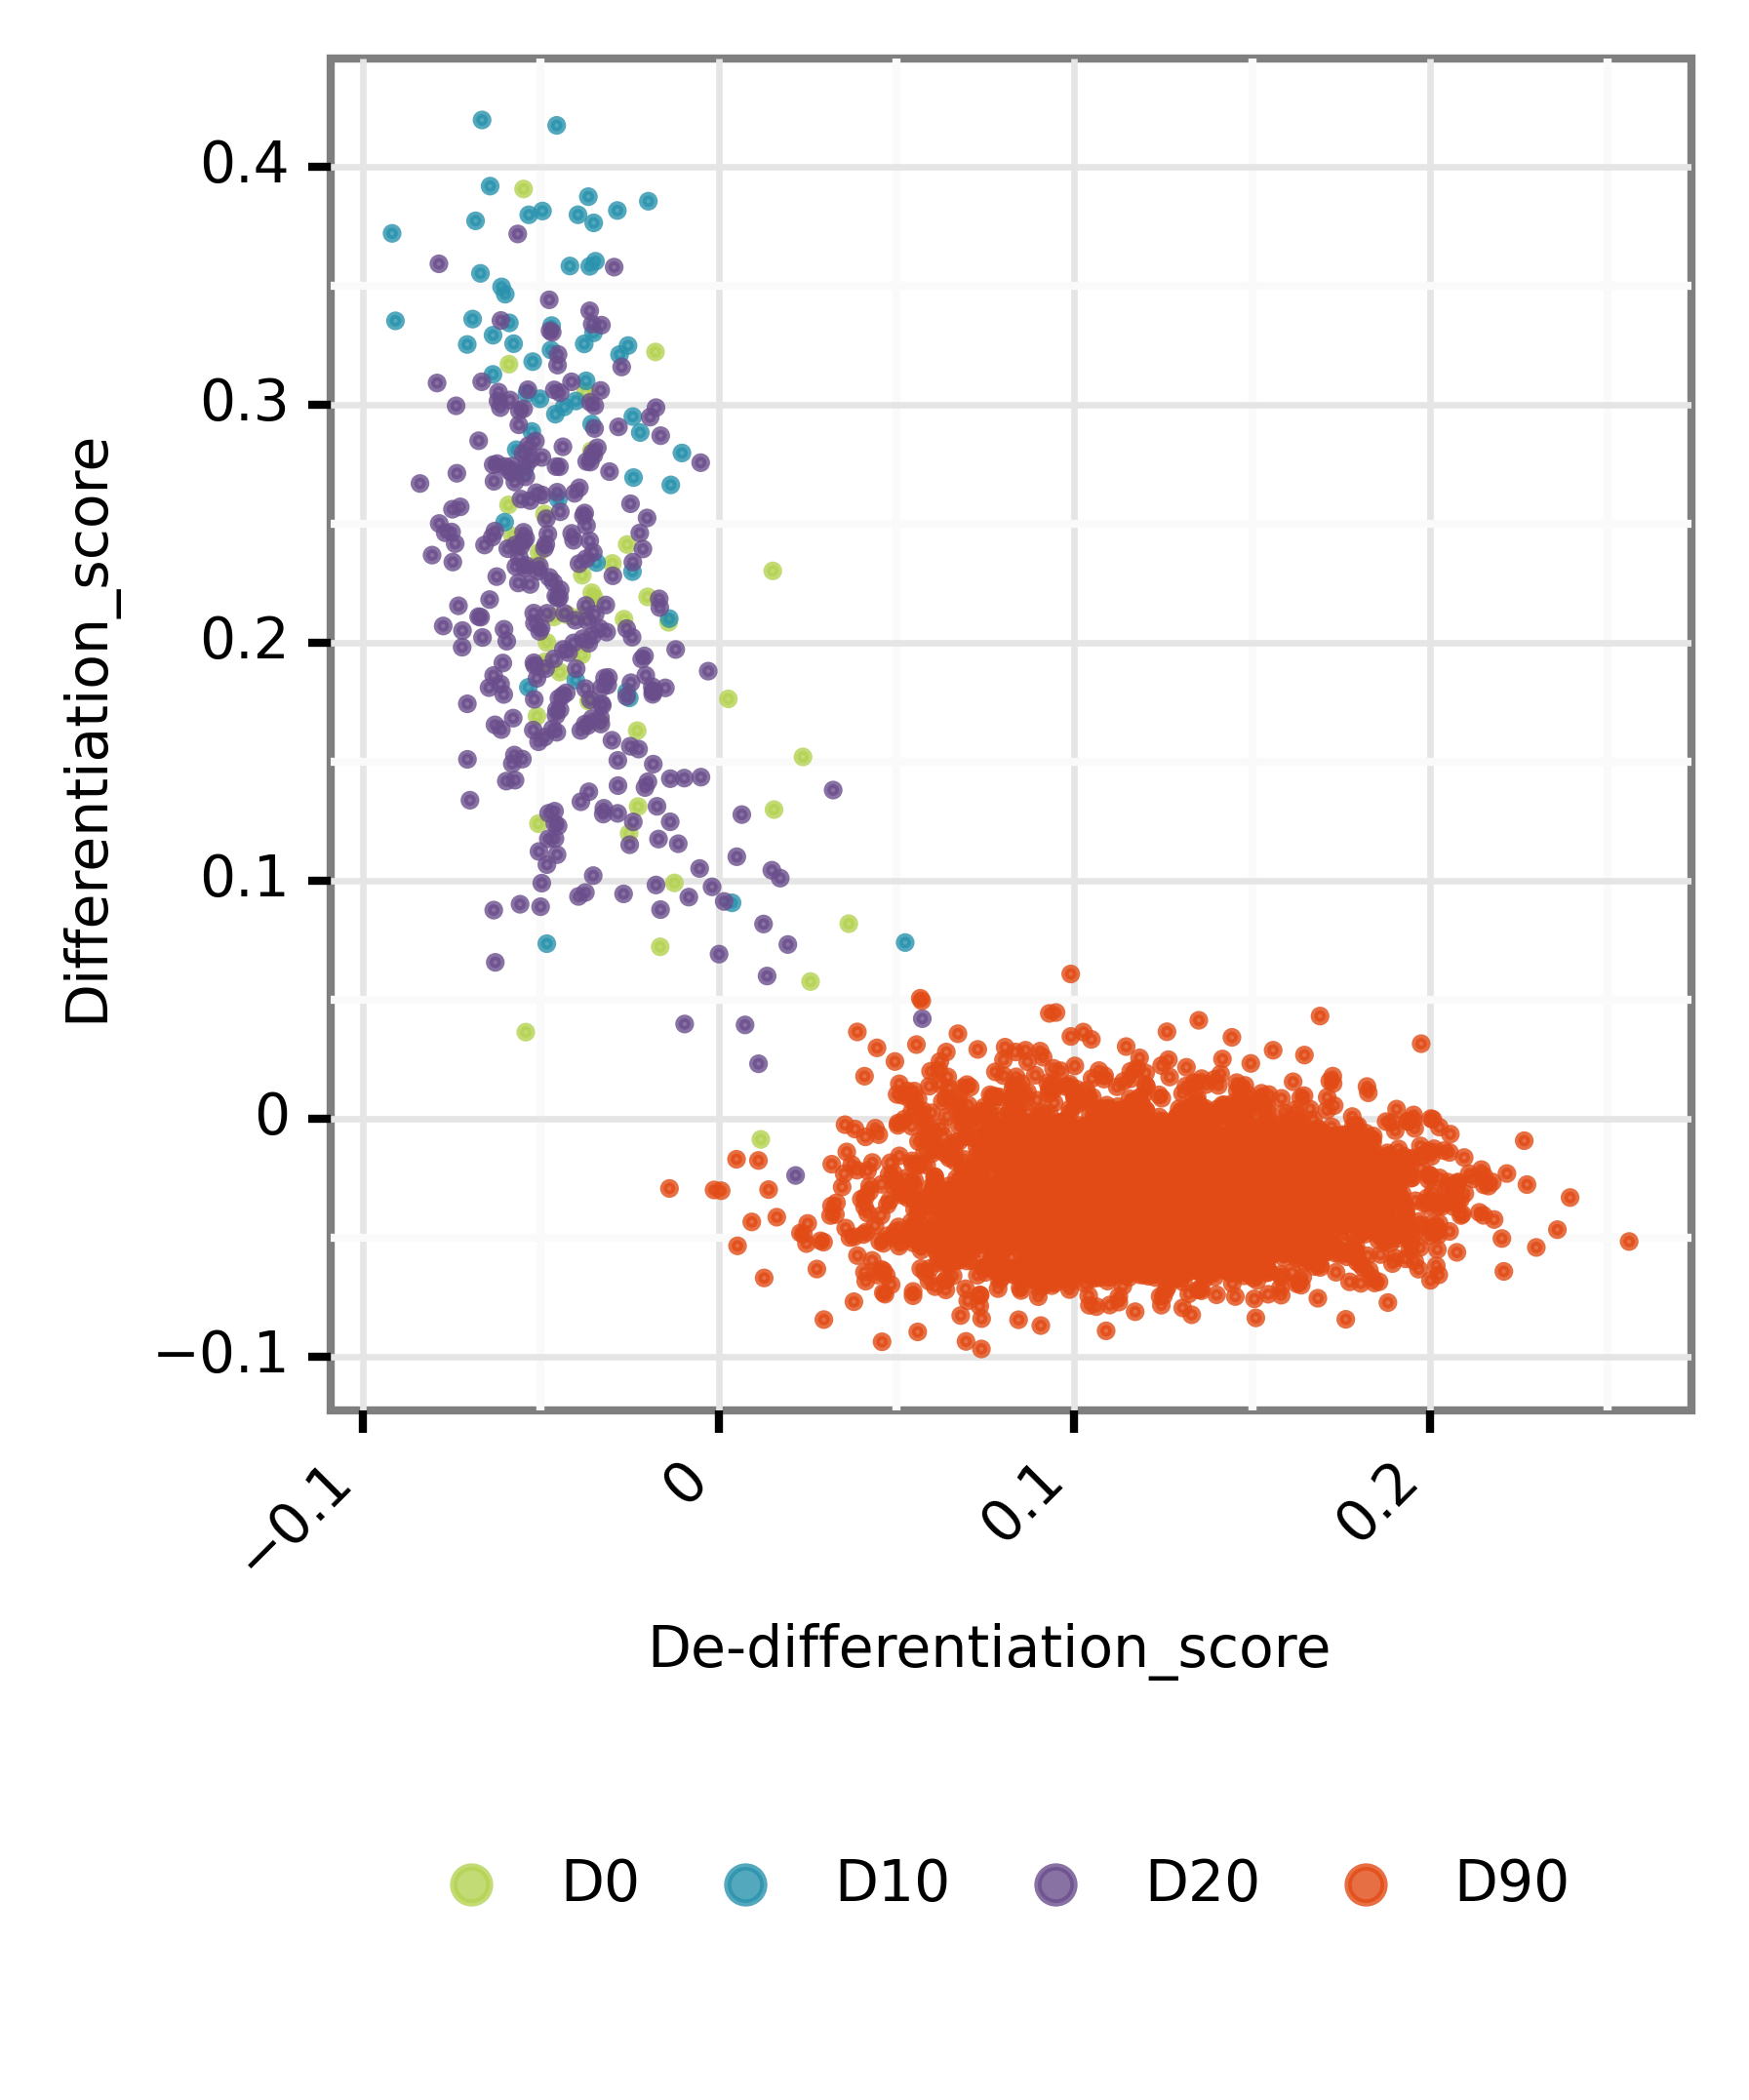

<ggplot: (2933140466917)>

In [28]:
plot=p9.ggplot(data=combined_adata.obs[combined_adata.obs.Lineage_assigned=='GENBC0283767'],
               mapping=p9.aes(x='De-differentiation_score',y='Differentiation_score',color="sample")
              )
plot+ p9.geom_point(alpha=0.8,size=0.3, show_legend=True) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.scale_color_manual(values = {'D0':'#B5D251','D10':'#2992AD','D20':'#6A4E8C','D90':'#E24B15'}) \
+ p9.theme(text=p9.element_text(size=7),legend_title=p9.element_blank(),legend_position=(.5, -.16),legend_direction='horizontal',legend_key=p9.element_blank()) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :2,'alpha':0.8 })) \
+ p9.theme(figure_size=(3,3)) # 3 inch

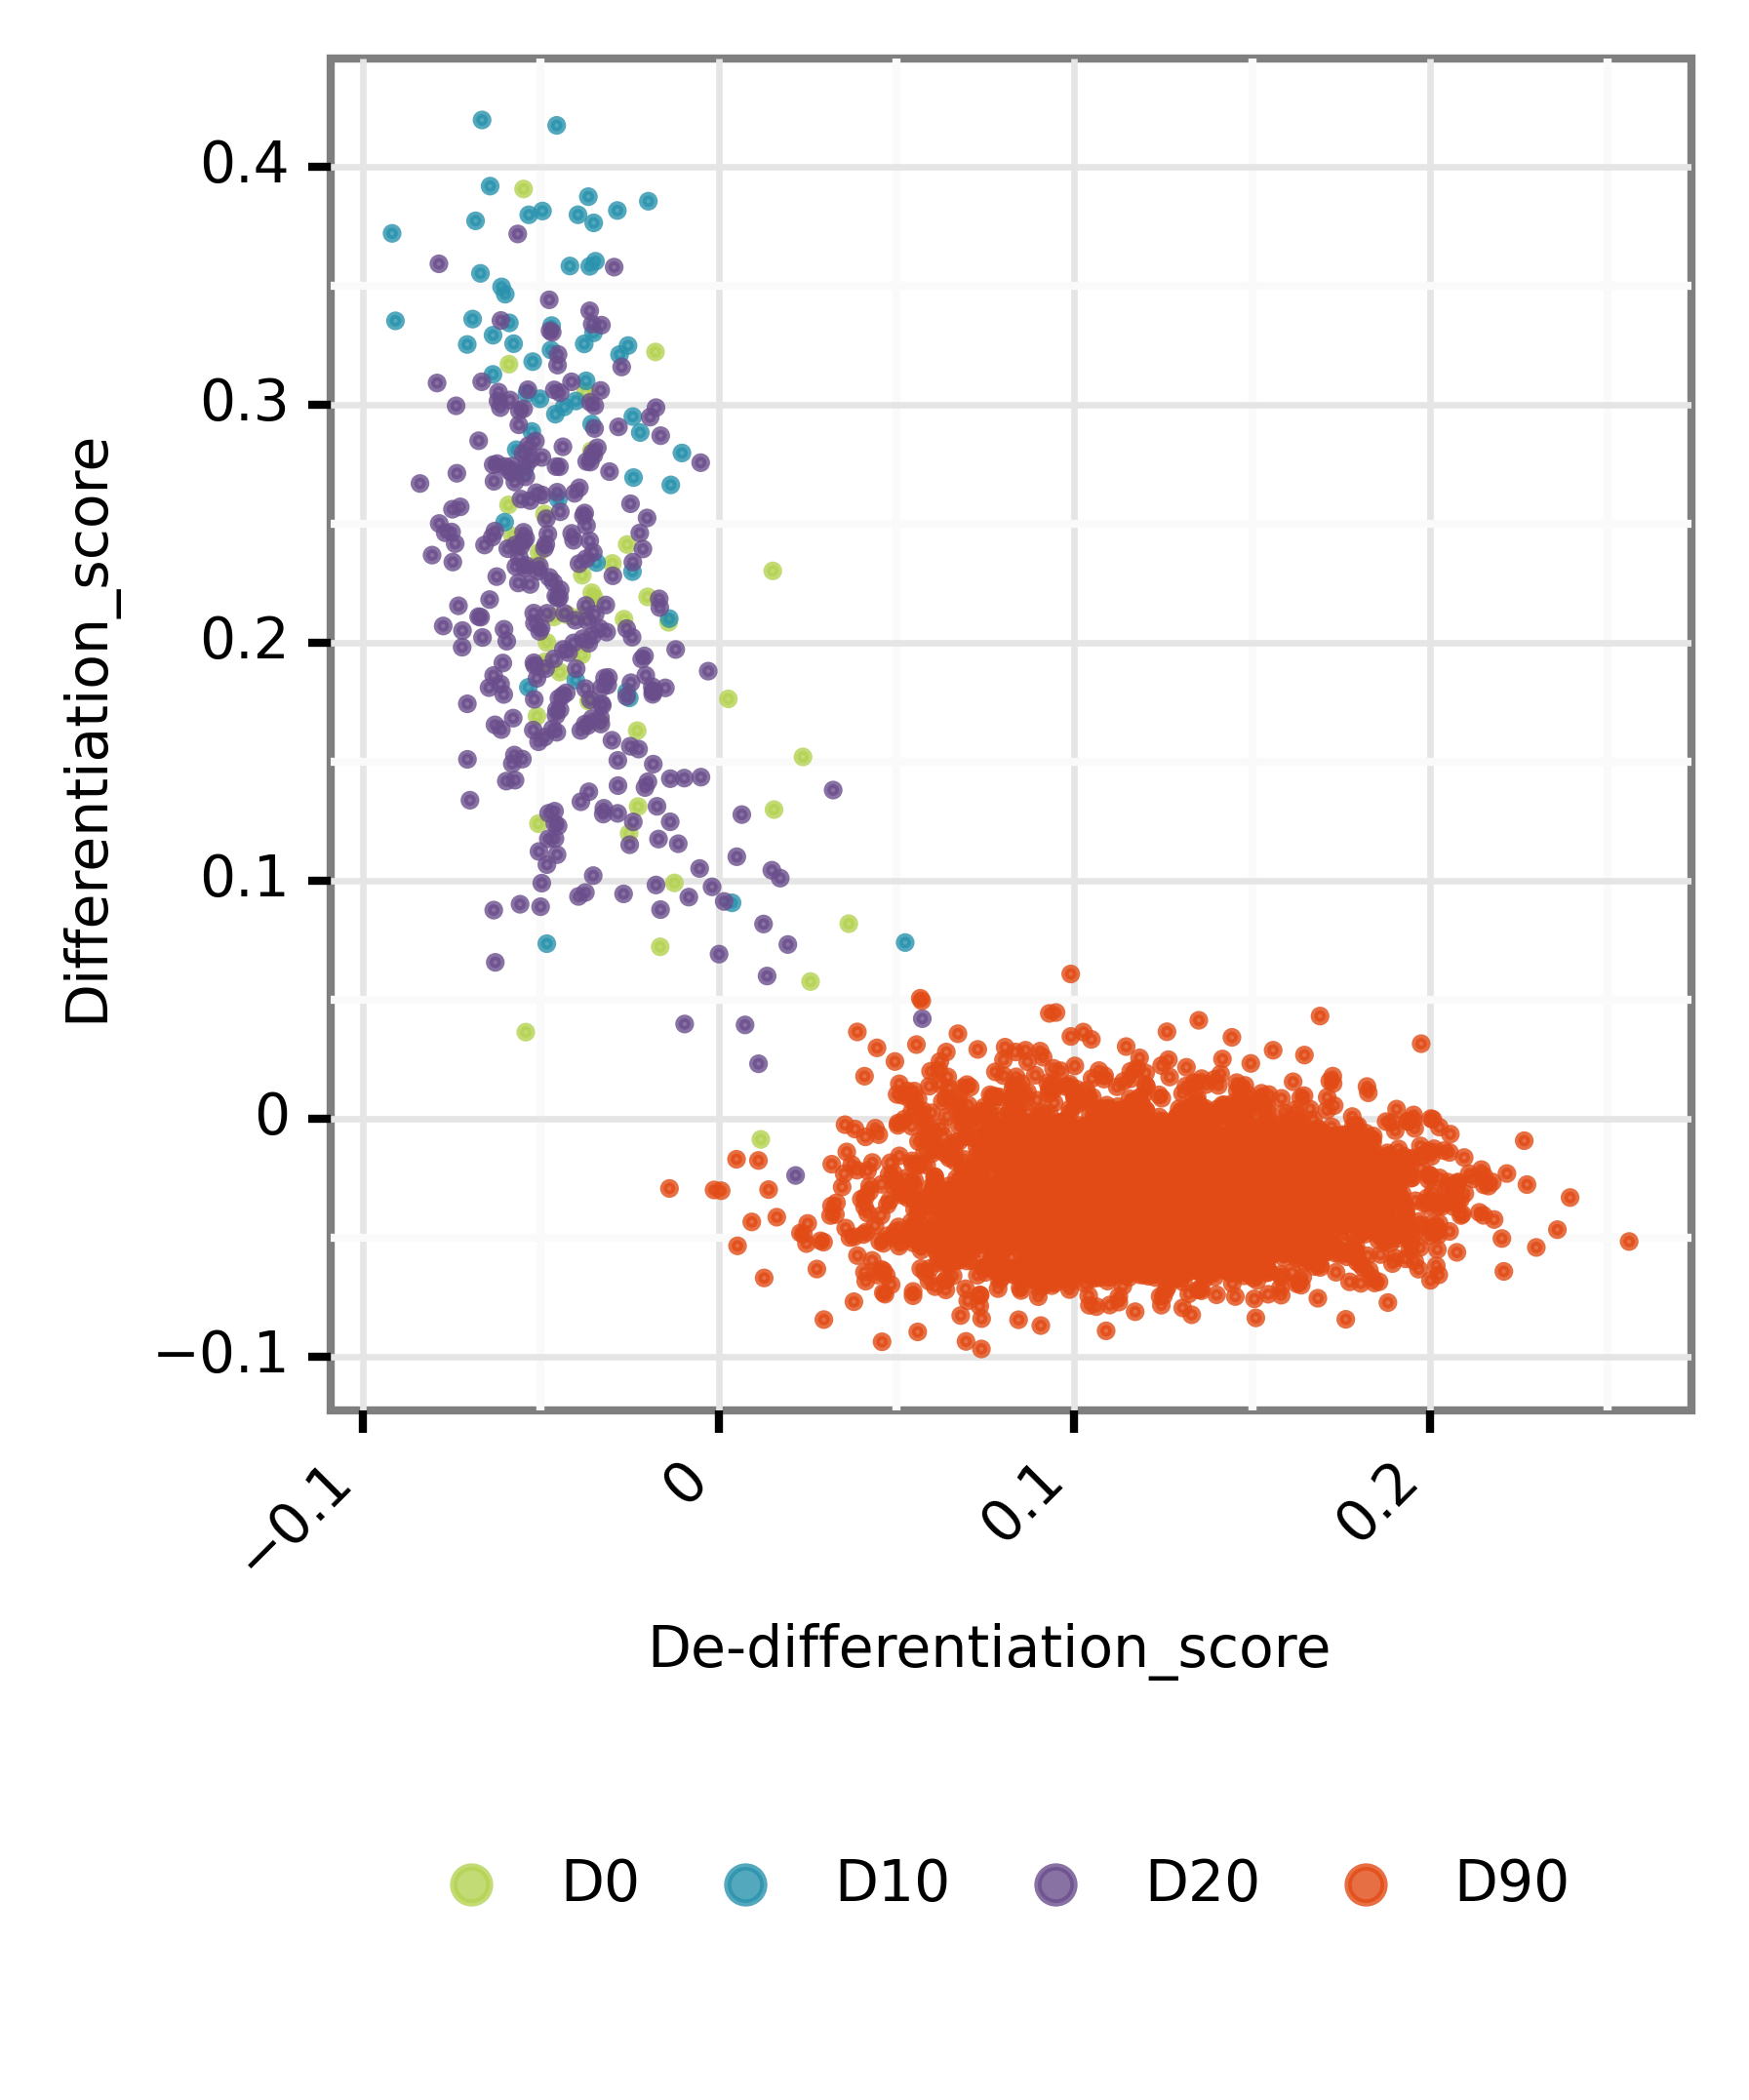

In [29]:
plot=p9.ggplot(data=combined_adata.obs[combined_adata.obs.Lineage_assigned=='GENBC0283767'],
               mapping=p9.aes(x='De-differentiation_score',y='Differentiation_score',color="sample")
              )
plotsave=plot+ p9.geom_point(alpha=0.8,size=0.3, show_legend=True) \
+ p9.themes.theme_bw() \
+ p9.theme(axis_text_x=p9.element_text(colour="black",angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(colour="black")) \
+ p9.scale_color_manual(values = {'D0':'#B5D251','D10':'#2992AD','D20':'#6A4E8C','D90':'#E24B15'}) \
+ p9.theme(text=p9.element_text(size=7),legend_title=p9.element_blank(),legend_position=(.5, -.16),legend_direction='horizontal',legend_key=p9.element_blank()) \
+ p9.guides(color = p9.guide_legend(override_aes={'size' :2,'alpha':0.8 })) \
+ p9.theme(figure_size=(3,3)) # 3 inch
fig=plotsave.draw()
fig.set_size_inches(3, 3)
points = fig.axes[0].collections[0]
points.set_rasterized(True)
fig.savefig('dedifferentiation.svg',format='svg',dpi=300,bbox_inches='tight')  